In [238]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [239]:
# Read files to pandas dataframes
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
sample_submission = pd.read_csv('data/SampleSubmission.csv')

In [240]:
special = ["Sample_ID", "Label"]
original_columns = list(set(train.columns) - set(special))

In [241]:
train.describe()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,1086

In [242]:
uniq = set(map(lambda s: s.split('_')[1] if '_' in s and not s in special else s, list(train.columns)))
uniq -=  set(special)
uniq = list(uniq)
", ".join(uniq)

'slope, elevation, lsfactor, placurv, geology, sdoif, aspect, twi, procurv'

In [243]:
desc = {}
desc["elevation"] = "Digital elevation of the terrain surface in meter"
desc["slope"] = "Angle of the slope inclination in degree"
desc["aspect"] = "Exposition of the slope in degree"
desc["placurv"] = "Planform curvature, curvature perpendicular to the direction of the maximum slope"
desc["procurv"] = "Profile curvature, curvature parallel to the slope, indicating the direction of maximum slope"
desc["lsfactor"] = "Length-slope factor that accounts for the effects of topography on erosion"
desc["twi"] = "Topographic wetness index, an index to quantify the topographic control on hydrological process"
desc["geology"] = {
    1: "Weathered Cretaceous granitic rocks",
    2: "Weathered Jurassic granite rocks",
    3: "Weathered Jurassic tuff and lava",
    4: "Weathered Cretaceous tuff and lava",
    5: "Quaternary deposits",
    6: "Fill",
    7: "Weathered Jurassic sandstone, siltstone and mudstone"
}
desc["sdoif"] = "Step duration orographic intensification factor: an index to quantify the amplification of orography on rainfall"

In [244]:
squares = pd.DataFrame()
for i in range(25):
    mycols = list(map(lambda col: f"{i+1}_{col}", uniq))
    squares = squares.append(train[mycols + special].rename(dict(zip(mycols, uniq)), axis=1))
squares

,slope,elevation,lsfactor,placurv,geology,sdoif,aspect,twi,procurv,Sample_ID,Label
0,35.26439,130,8.045186,0.038514,3,1.281767,98.1301,3.173340,0.013903,1,0
1,32.31153,161,9.089893,0.007030,3,1.359568,198.4350,4.396348,-0.012546,2,1
2,42.67464,149,12.115220,0.007581,2,1.365062,310.6013,3.912020,-0.015857,3,0
3,19.82703,80,3.416162,0.033529,2,1.100921,213.6901,3.021531,0.018884,4,0
4,32.63194,117,7.740312,0.005615,2,1.284558,128.6598,3.523277,-0.000098,5,0
...,...,...,...,...,...,...,...,...,...,...,...
10859,17.54840,192,0.922690,-0.007938,2,1.272048,108.4350,5.979714,-0.028007,10860,0
10860,26.56505,418,5.760761,0.020360,3,1.331126,180.0000,3.510076,0.004467,10861,1
10861,40.31554,323,12.188480,-0.024226,3,1.298311,135.0000,4.327808,-0.017149,10862,1
10862,32.31153,103,6.825168,0.038743,2,1.355067,251.5650,2.963617,0.030222,10863,0


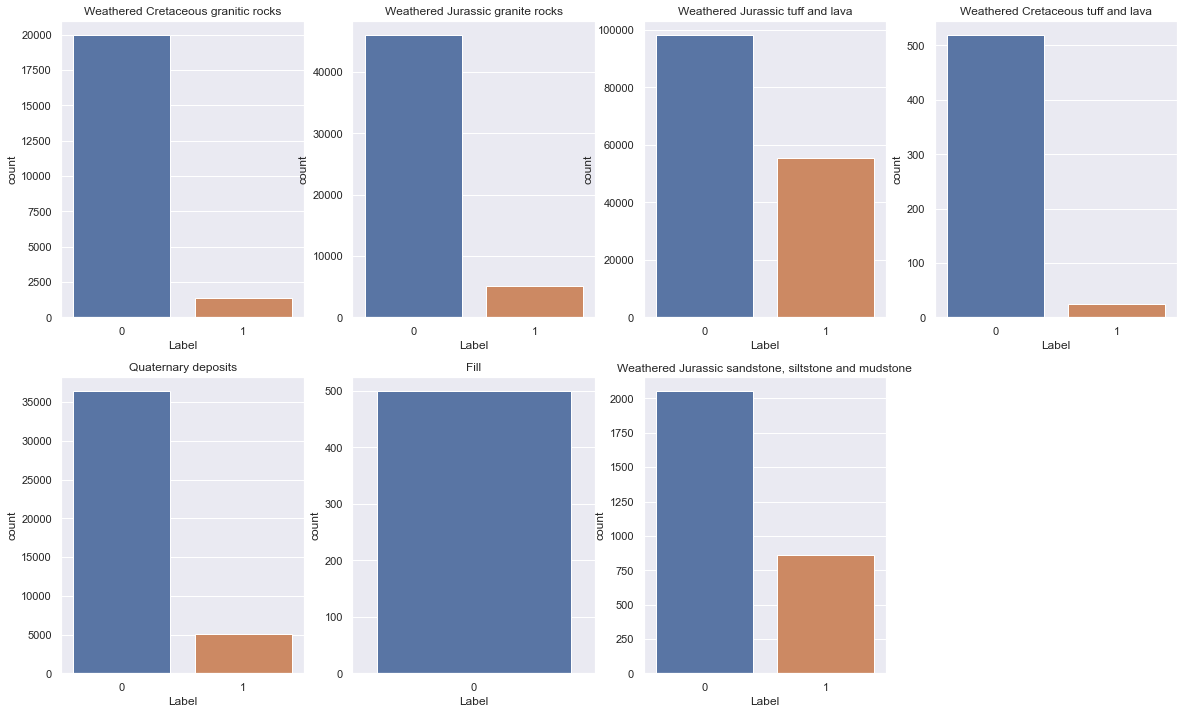

In [245]:
plt.figure(figsize=(20, 12))
for i in range(1, 8):
    plt.subplot(2, 4, i)
    sns.countplot(x= squares[squares["geology"] == i].Label)
    plt.title(desc["geology"][i])

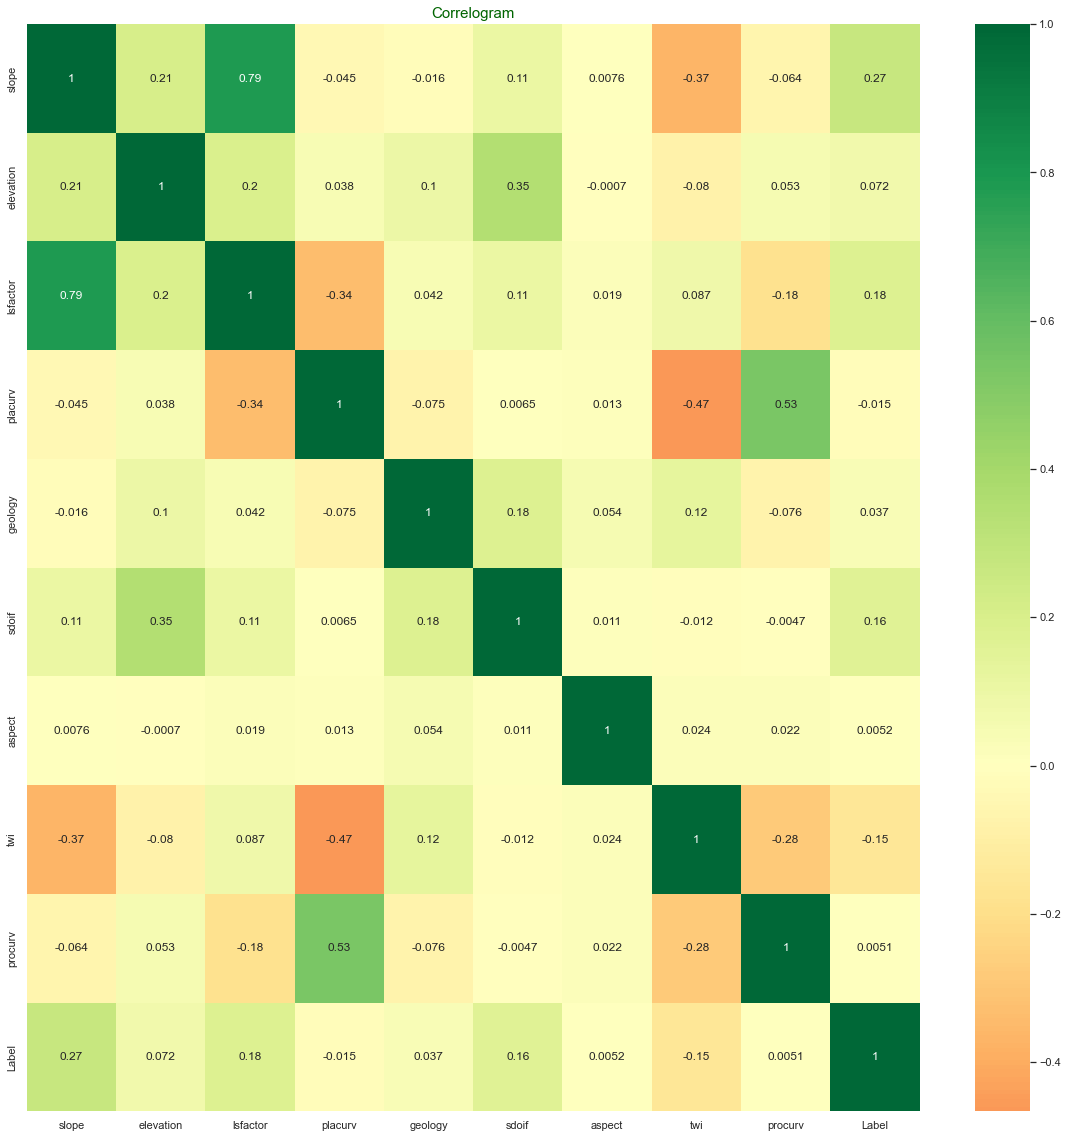

In [246]:
corr = squares.drop(["Sample_ID"], axis=1).corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

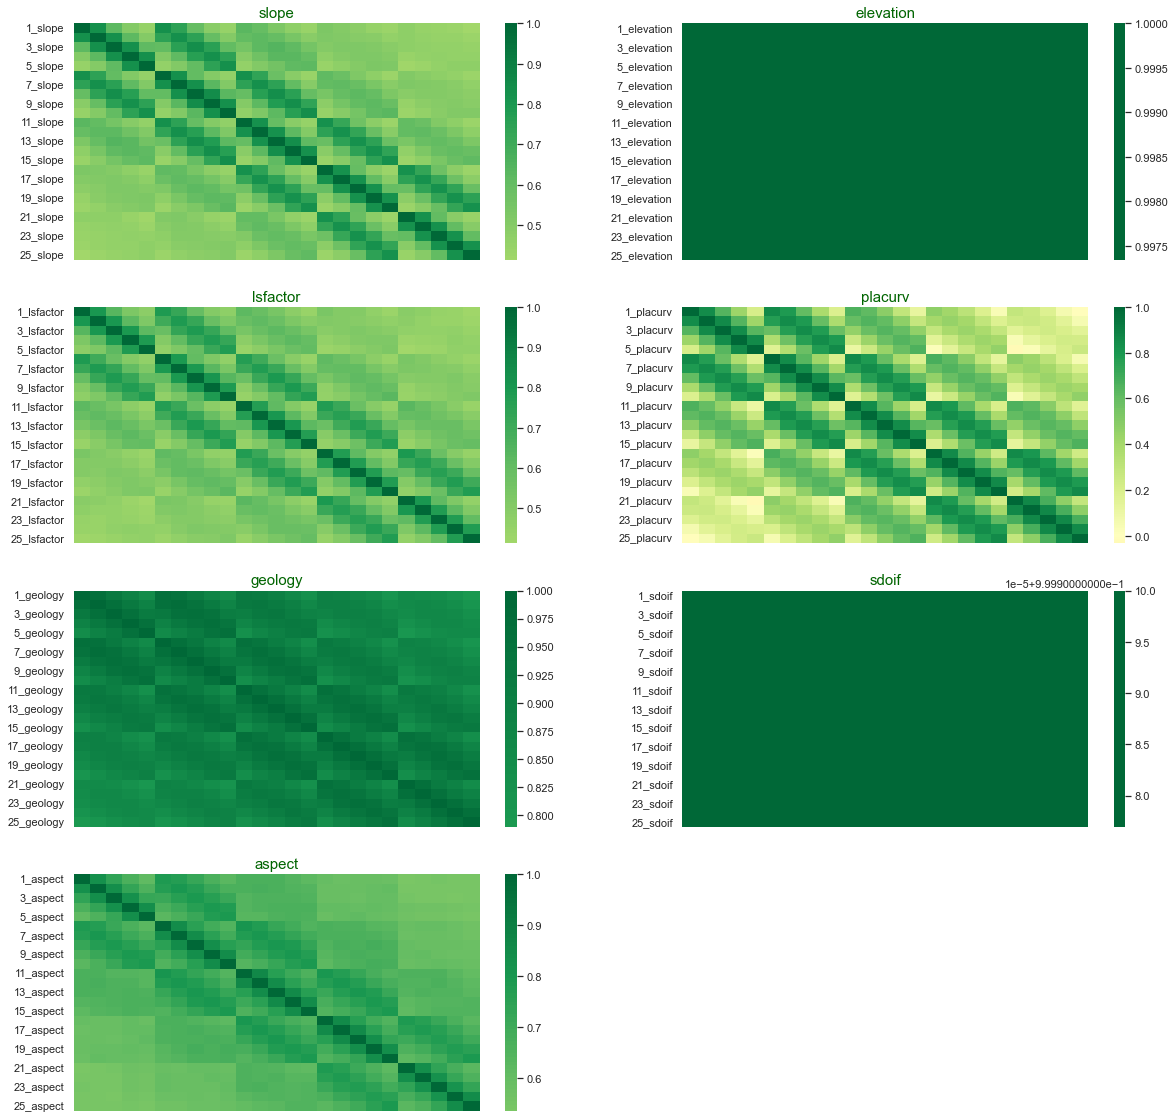

In [247]:
from dfcols import all_square_cols
plt.figure(figsize=(20, 20))
for i in range(7):
    plt.subplot(4, 2, i+1)
    corr = train[all_square_cols(uniq[i])].corr()
    sns.heatmap(corr, cmap='RdYlGn', center = 0)
    plt.title(uniq[i], fontsize = 15, color = 'darkgreen')
    plt.xticks([])

In [248]:
np.array(squares["geology"] == 6, dtype=int).sum()

500

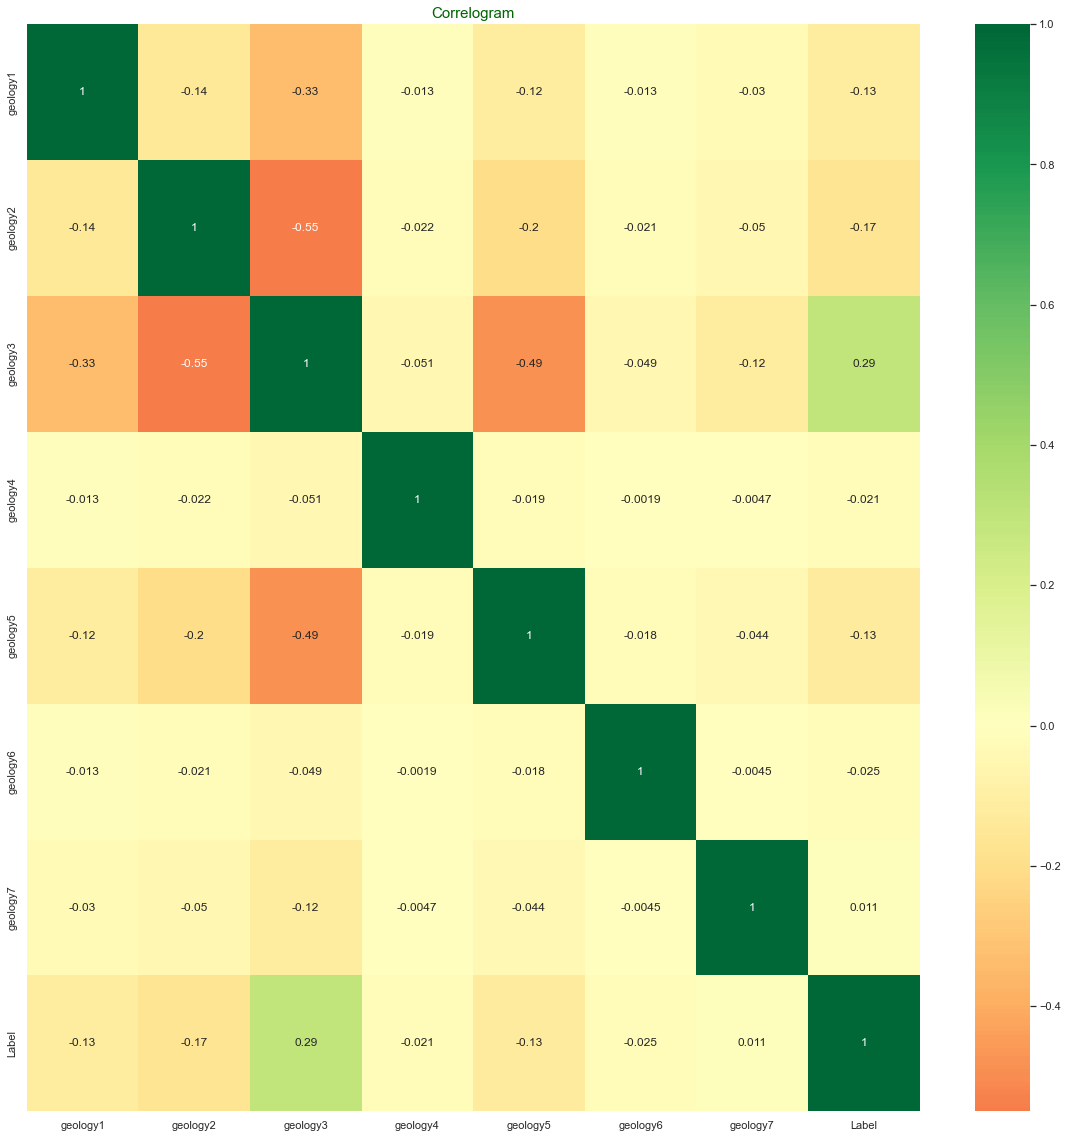

In [249]:
from feat_trans import one_hot
for i in range(7):
    squares[f"geology{i+1}"] = one_hot(squares, "geology", i+1)

geos = [f"geology{i+1}" for i in range(7)]
corr = squares[geos + ["Label"]].corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [250]:
import feat_trans
train["geology"] = feat_trans.most_frequent(train, "geology")

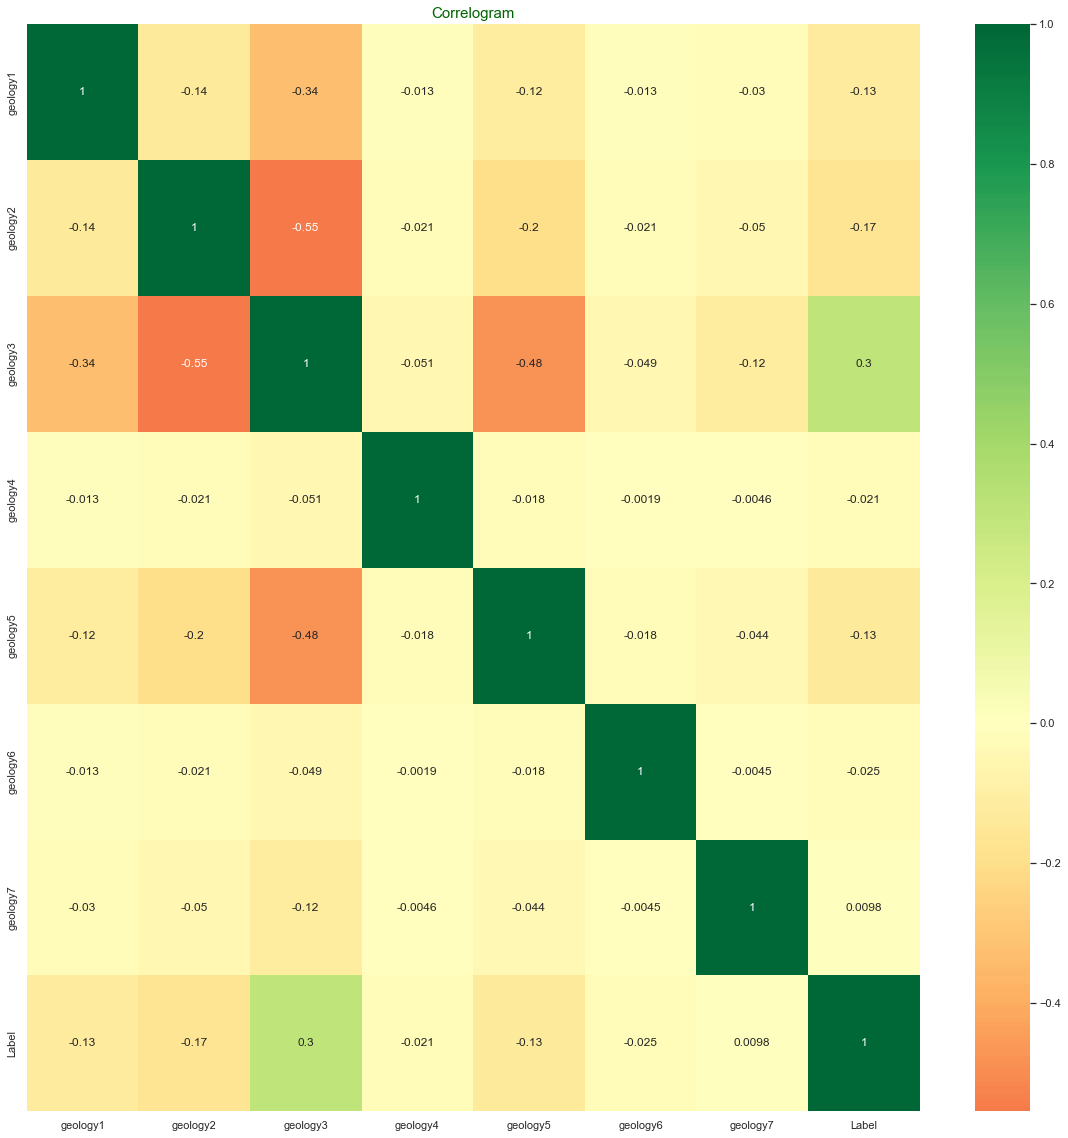

In [251]:
for i in range(7):
    train[f"geology{i+1}"] = one_hot(train, "geology", i+1)

corr = train[[f"geology{i+1}" for i in range(7)] + ["Label"]].corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [252]:
cont = list(set(uniq) - set(["geology"]))
", ".join(cont)

'slope, elevation, lsfactor, placurv, twi, aspect, sdoif, procurv'

In [253]:
for col in cont:
    train[f"{col}_mean"] = feat_trans.mean(train, col)
    train[f"{col}_std"] = feat_trans.std(train, col)

In [254]:
means = [f"{col}_mean" for col in cont]
stds = [f"{col}_std" for col in cont]

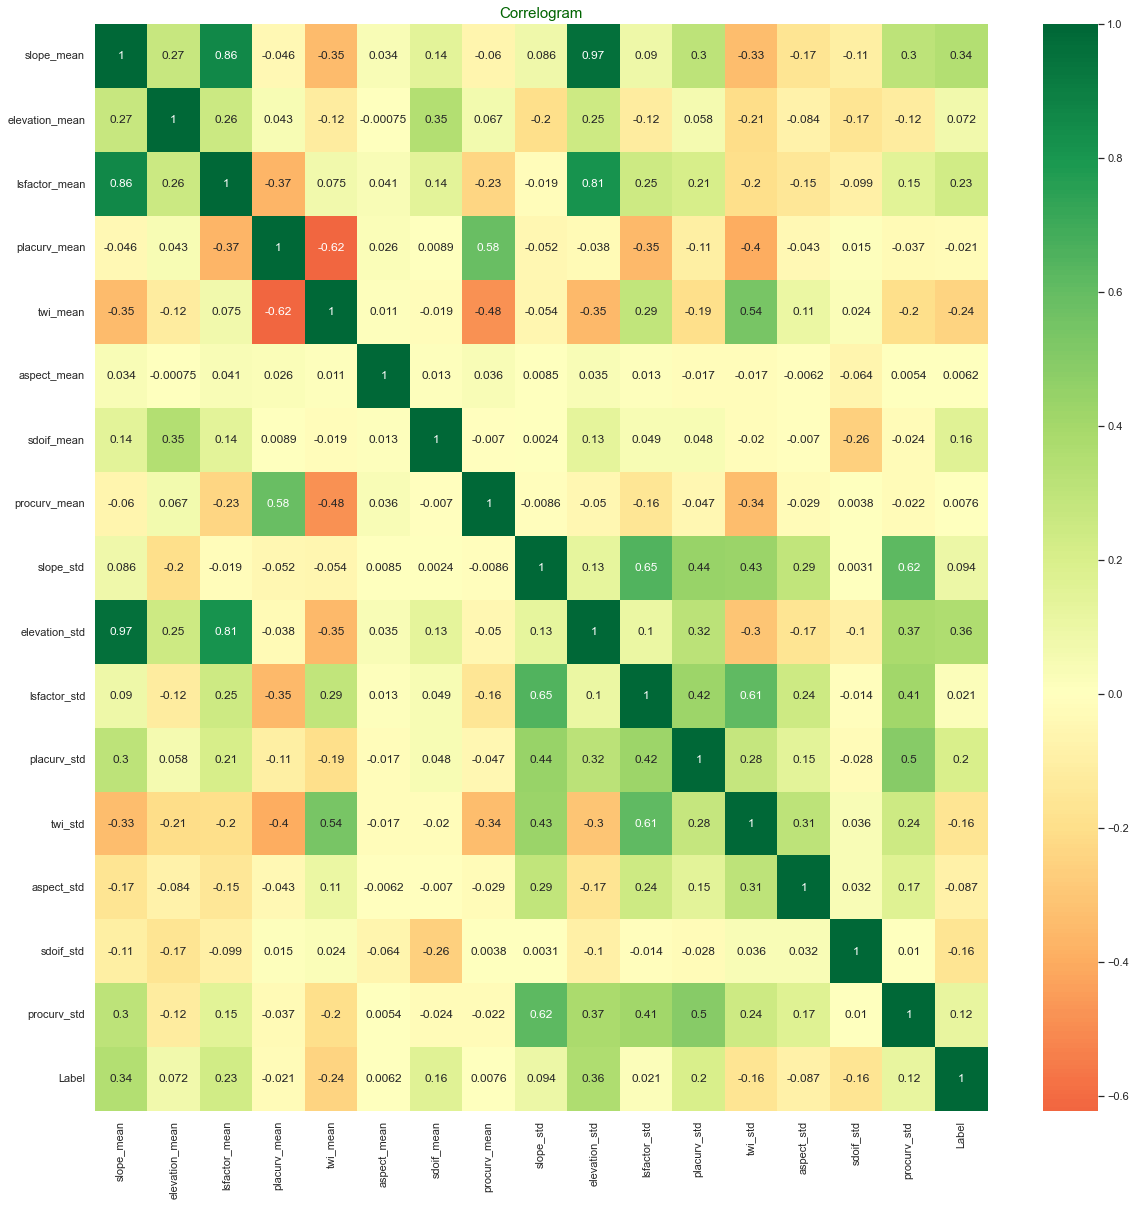

In [255]:
corr = train[means + stds + ["Label"]].corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [256]:
train[means + stds].describe()

,slope_mean,elevation_mean,lsfactor_mean,placurv_mean,twi_mean,aspect_mean,sdoif_mean,procurv_mean,slope_std,elevation_std,lsfactor_std,placurv_std,twi_std,aspect_std,sdoif_std,procurv_std
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000
mean,28.254034,224.834183,7.693782,0.000554,4.540098,187.413859,1.301057,-0.000184,5.491054,3.950607,2.027241,0.015260,0.931792,37.149141,0.000099,0.013046
std,7.549079,158.261783,2.855506,0.018118,0.991463,84.567059,0.051894,0.014013,2.645571,1.425675,1.184415,0.008031,0.790937,42.375016,0.000087,0.007913
min,6.547674,2.960000,0.001403,-0.082686,2.299132,11.884689,1.092452,-0.077813,0.242184,0.692820,0.001152,0.000054,0.101251,1.593168,0.000005,0.000045
25%,23.094402,101.430000,5.723727,-0.010534,3.810877,116.528060,1.286432,-0.007712,3.555463,2.959865,1.247696,0.009423,0.402875,11.365407,0.000048,0.007837
50%,28.300718,191.280000,7.546701,0.000792,4.373911,184.062198,1.308126,-0.000506,4.844952,3.844164,1.725479,0.013280,0.629487,17.790866,0.000062,0.010764
75%,33.302306,311.320000,9.475817,0.012297,5.138590,259.891378,1.331631,0.007246,6.790685,4.789655,2.440486,0.019089,1.153105,37.406930,0.000141,0.015636
max,60.894232,911.360000,24.131212,0.094629,11.979647,357.238504,1.370632,0.115547,18.803736,15.503600,14.687505,0.085922,6.320540,174.683842,0.001852,0.087726


In [257]:
normed_cols = []
for col in original_columns:
    normed_cols.append(f"{col}_norm")
    train[f"{col}_norm"] = feat_trans.normalize(train, col)

In [258]:
y = train["Label"]
X1 = train[original_columns].to_numpy()
X2 = train[means + stds + geos].to_numpy()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X1, y)
X3 = ss.transform(X1)
X4 = train[normed_cols].to_numpy()
ss = StandardScaler().fit(X2, y)
X5 = ss.transform(X2)

In [125]:
from importlib import reload
reload(feat_trans)

<module 'feat_trans' from '/Users/finn/me/dev/2022/start/startHack/feat_trans.py'>

In [259]:
for i, X in enumerate([X3, X4, X5]):
    f1 = feat_trans.test_feats_svc(X, y)
    print(f1)

0.6739600202925358
0.633029005897709
0.6437975150360087


In [260]:
len(means + stds + geos)
len(original_columns)

225

In [261]:
import imblearn
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X3, y)
feat_trans.test_feats_svc(X, y)

0.7602251717362352

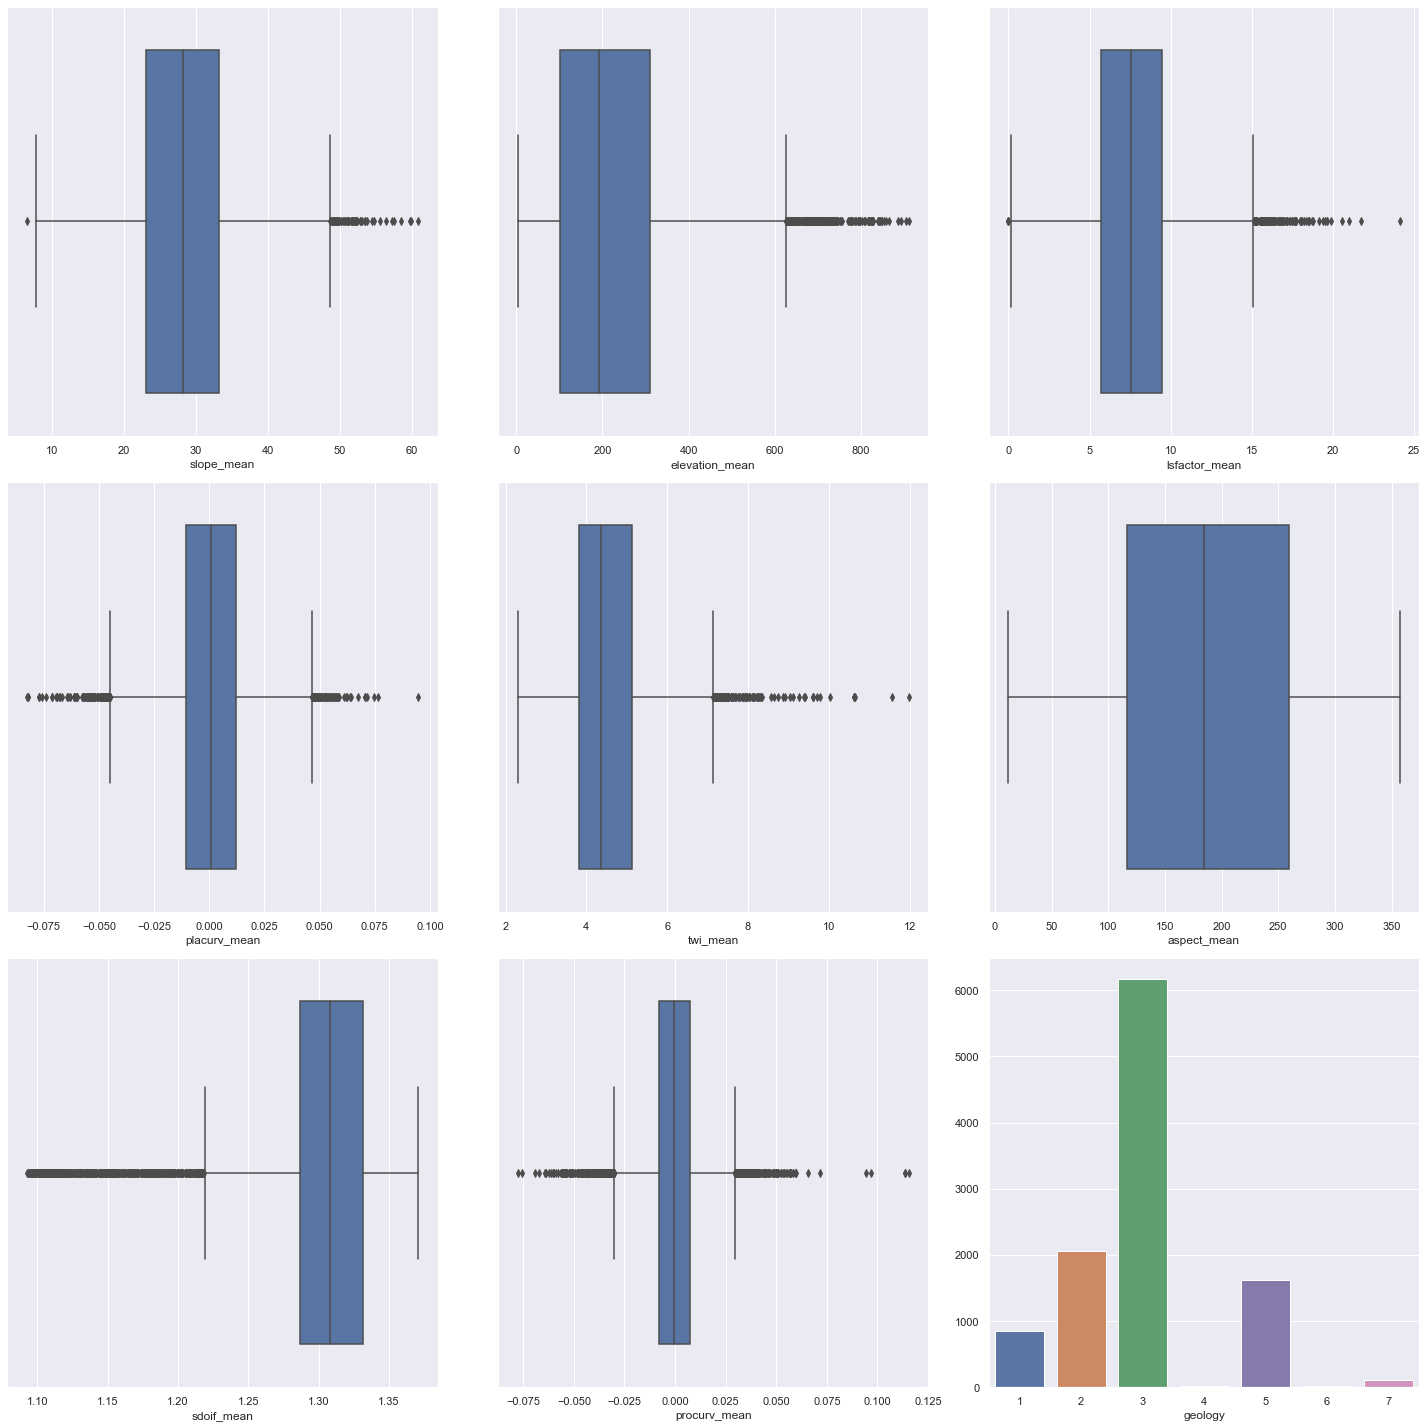

In [262]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(means):
    plt.subplot(3, 3, (i+1))
    sns.boxplot(data=train, x=col)
    plt.ylabel("")
plt.subplot(3, 3, 9)
sns.countplot(data=train, x="geology")
plt.ylabel("")
plt.tight_layout()
plt.savefig("media/boxes.png")

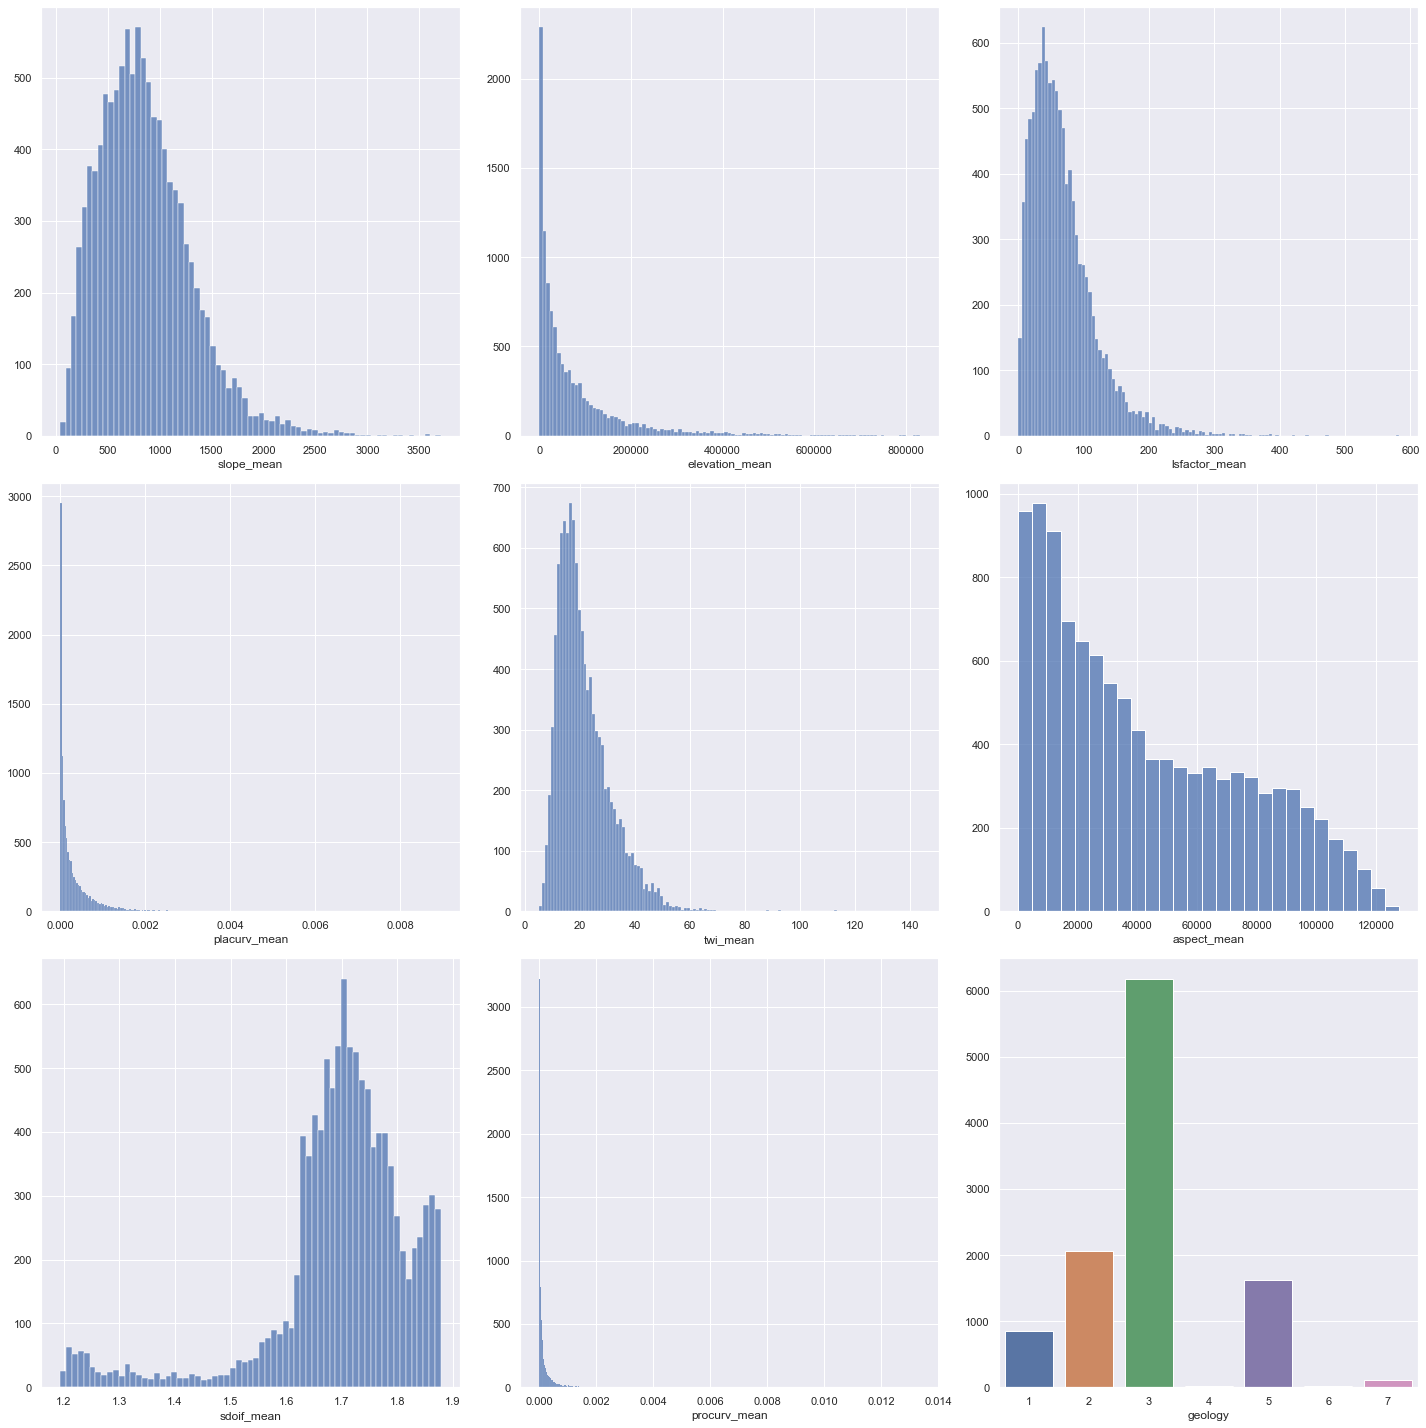

In [263]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(means):
    plt.subplot(3, 3, (i+1))
    sns.histplot(np.square(train[col]), label=f"square {col}")
    plt.ylabel("")
plt.subplot(3, 3, 9)
sns.countplot(data=train, x="geology")
plt.ylabel("")
plt.tight_layout()
plt.savefig("media/distssquare.png")

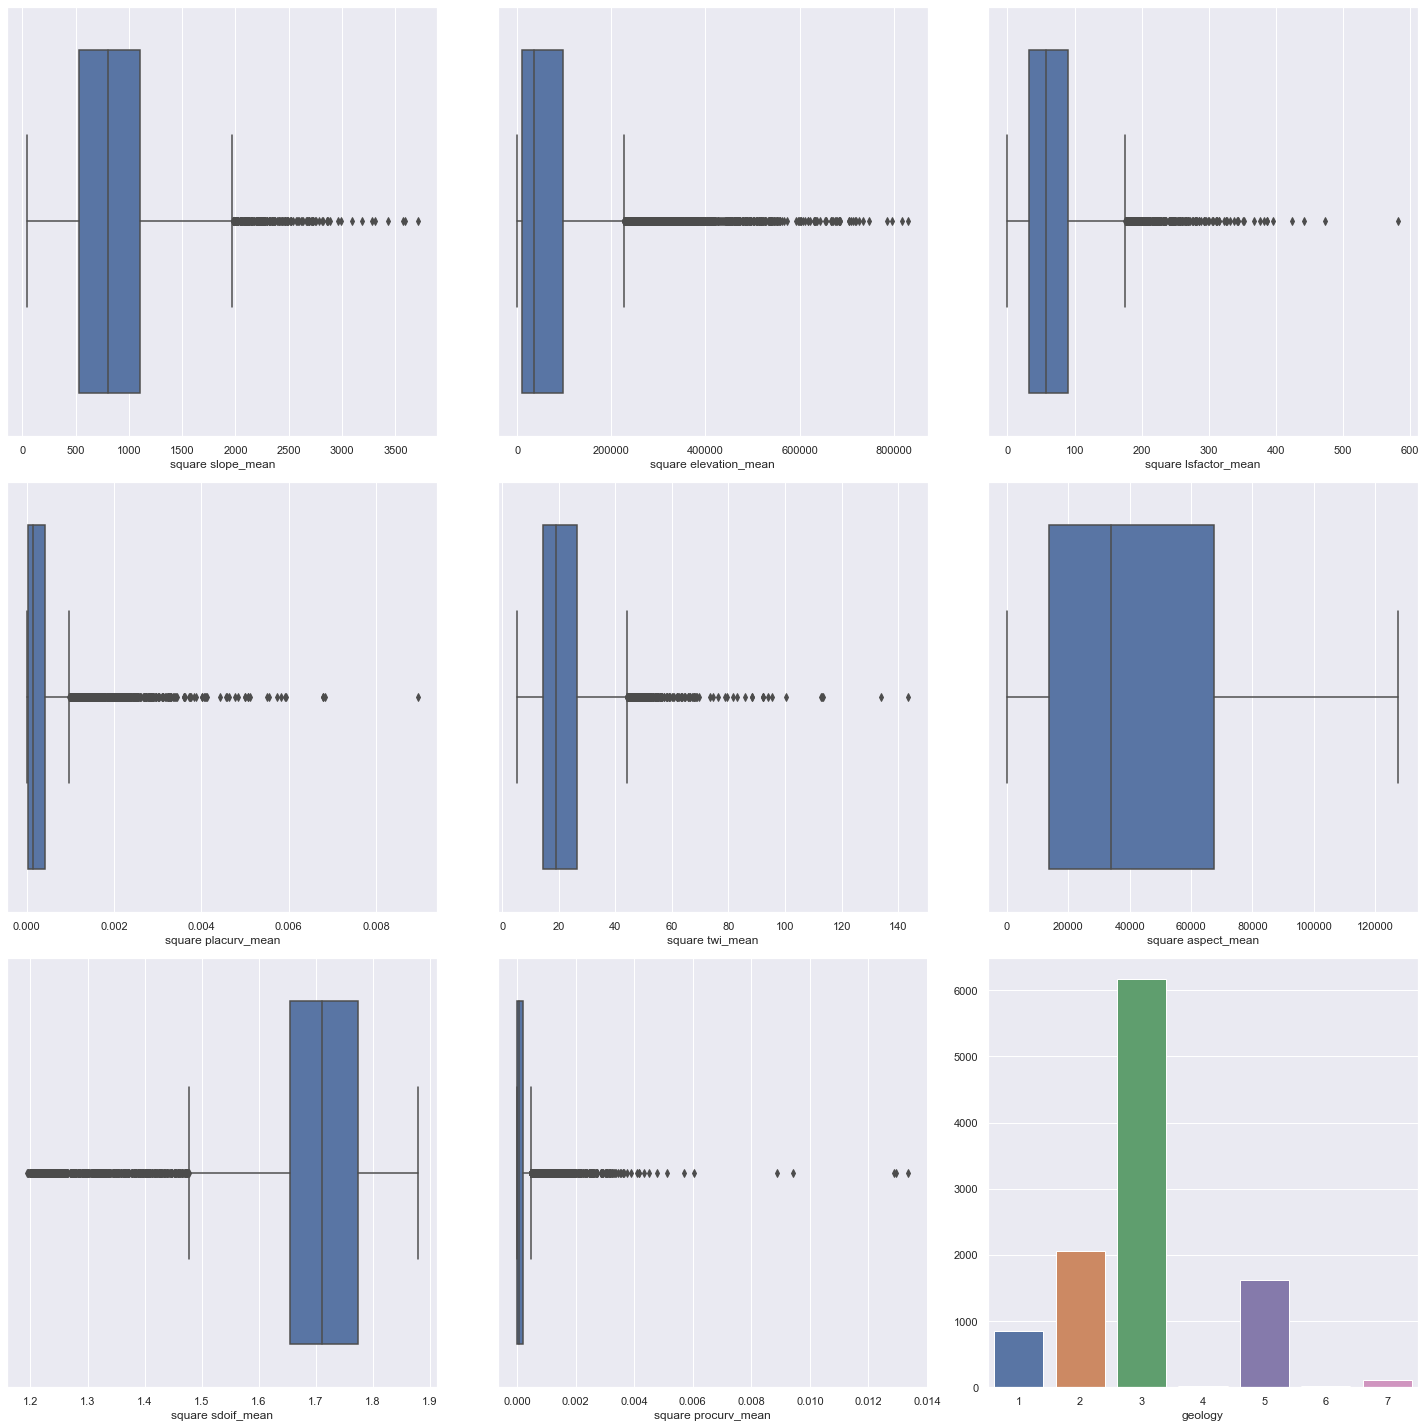

In [264]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(means):
    plt.subplot(3, 3, (i+1))
    sns.boxplot(np.square(train[col]))
    plt.xlabel(f"square {col}")
    plt.ylabel("")
plt.subplot(3, 3, 9)
sns.countplot(data=train, x="geology")
plt.ylabel("")
plt.tight_layout()
plt.savefig("media/boxessquare.png")

In [265]:
geos

['geology1',
 'geology2',
 'geology3',
 'geology4',
 'geology5',
 'geology6',
 'geology7']

In [266]:
reload(feat_trans)
fns = [np.array, np.log, np.square, np.sqrt]
fn_names = ['id', 'log','sq', 'sqrt']
test_cols = list(geos)
column_dict = dict(zip(range(len(test_cols)), geos))
i = len(test_cols)
for col in means + stds:
    for fn, name in zip(fns, fn_names):
        cn = f"{col}_{name}"
        column_dict[i] = cn
        i += 1
        #ss = StandardScaler().fit(train[[col]], y)
        #arr = fn(ss.transform(train[[col]]))
        if name == 'log':
            arr = fn(feat_trans.special_normalize(train, col) + 1)
        else:
            arr = fn(feat_trans.normalize(train, col))
        if np.isinf(arr).sum():
            print(cn)
        train[cn] = arr
        test_cols.append(cn)

In [267]:
from sklearn.feature_selection import SelectKBest, SelectFpr, SelectFromModel
from sklearn.feature_selection import chi2
X, y = train[test_cols].to_numpy(), np.array(train["Label"])
X, y = SMOTE().fit_resample(X, y)
ss = StandardScaler().fit(X, y)
X = ss.transform(X)
X = X - X.min()

In [268]:
X_kbest = SelectKBest(chi2, k=25).fit_transform(X, y)

### all transformed features:

In [269]:
feat_trans.test_feats_svc(X, y)

0.7288298467308456

In [270]:
X_base, y_base = train[original_columns].to_numpy(), train["Label"]
ss = StandardScaler().fit(X_base, y_base)
X_base = ss.transform(X_base)
X_base, y_base = SMOTE().fit_resample(X_base, y_base)
feat_trans.test_feats_svc(X_base, y_base)

0.761839448117582

### svm baseline original inputs:
f1 = 0.7609937405291228

In [204]:
X_fpr = SelectFpr(chi2).fit_transform(X, y)
X_fpr.shape

(16296, 662)

In [205]:
feat_trans.test_feats_svc(X_fpr, y)

0.68004021624465

In [215]:
from sklearn.svm import LinearSVC

def svc_features(n):
    lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
    model = SelectFromModel(lsvc, prefit=True, max_features=n)
    #svc = SVC().fit(X, y)
    #model = SelectFromModel(svc, prefit=True)
    X_svc = model.transform(X)
    return feat_trans.test_feats_svc(X_svc, y)

print([svc_features(i) for i in [10, 25, 50, 100, None]])

[0.5554355457379503, 0.5484398798510427, 0.6156254137068214, 0.6292288258176536, 0.7226334961778834]


In [218]:
reload(feat_trans)
from sklearn.ensemble import ExtraTreesClassifier
def tree_features(n):
    clf = ExtraTreesClassifier(n_estimators=50)
    clf = clf.fit(X, y)
    model = SelectFromModel(clf, prefit=True, max_features=n)
    X_clf = model.transform(X)
    return feat_trans.test_feats(ExtraTreesClassifier(n_estimators=50), X_clf, y)

In [219]:
for n in [10, 25, 50, 100, None]:
    print(tree_features(n))

0.5956781704235005
0.6407556250975557
0.6485482272712267
0.7472764799088732
0.7764070317831667


In [229]:
len(test_cols) - len(geos)


0

In [194]:
from sklearn.svm import SVC
svc = SVC(random_state=42).fit(X, y)
model = SelectFromModel(svc, prefit=True)

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

In [224]:
len(train.columns)

540